In [1]:
#!pip install seaborn

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#import seaborn as sns
from tqdm import tqdm

# Cartoon set info


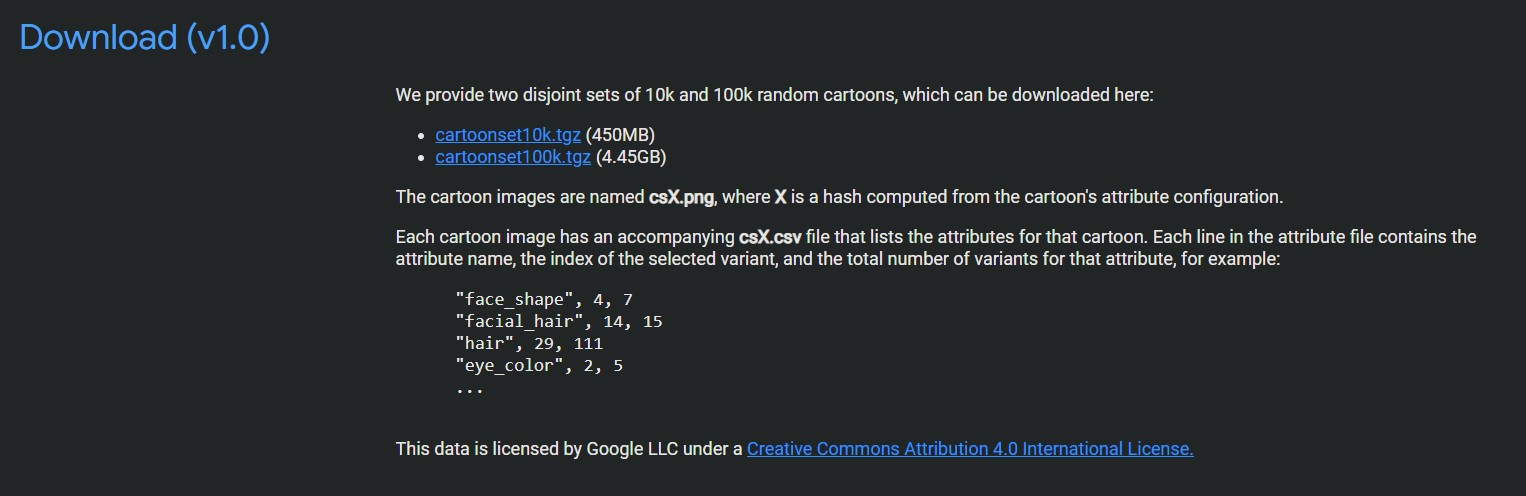

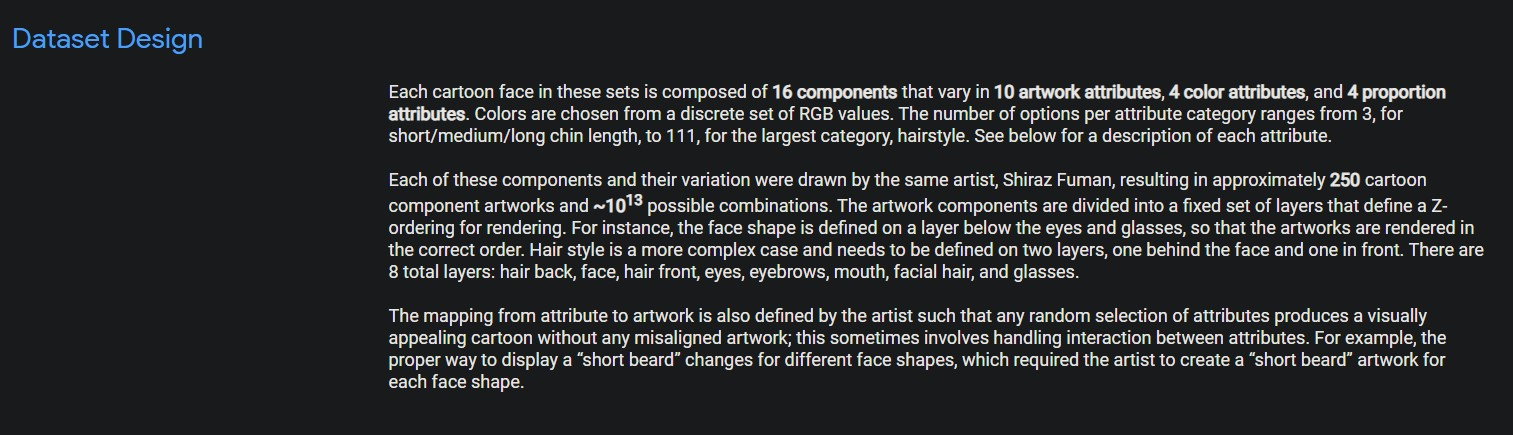

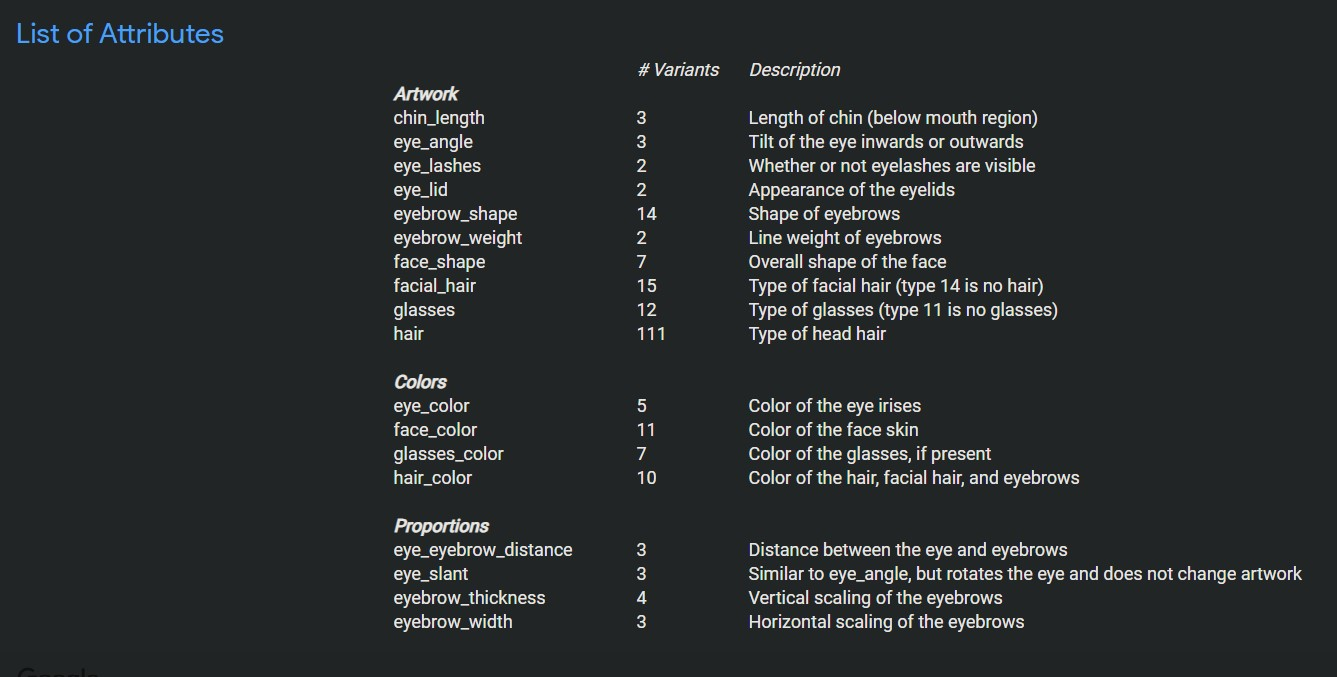

# Create image info dataset


In [3]:
path_cartoons = "/data/shuaman/xgan/cartoonset100k"

In [26]:
list_sub_folders = ["0","1","2","3",
                   "4","5","6","7","8","9"]

In [4]:
def read_cartoon_dataset(path_cartoons, list_sub_folders):
    
    df = pd.DataFrame()
    for index in tqdm(list_sub_folders):
        path_folder = os.path.join(path_cartoons,index)
        list_files = [file for file in os.listdir(path_folder) if '.csv' in file ]        
        
        for file in list_files:
            path_csv = os.path.join(path_folder, file)
            df_cartoon = pd.read_csv(path_csv,header=None)
            df_cartoon.columns = ["attribute_name", "index_variant","total_num_variants"]
            df_cartoon["filename"] = index + "/" + file
            df_cartoon = df_cartoon.pivot(index="filename",columns="attribute_name", values="index_variant")
            
            df = pd.concat([df, df_cartoon])        
        
    return df

In [45]:
df_cartoon = read_cartoon_dataset(path_cartoons, list_sub_folders)

100%|██████████| 10/10 [05:39<00:00, 33.91s/it]


In [46]:
df_cartoon = df_cartoon.reset_index()

In [47]:
df_cartoon['subfolder'] = df_cartoon["filename"].apply(lambda x: x.split('/')[0])
df_cartoon['filename'] = df_cartoon["filename"].apply(lambda x: x.split('/')[-1])

In [48]:
df_cartoon.head()

attribute_name,filename,chin_length,eye_angle,eye_color,eye_eyebrow_distance,eye_lashes,eye_lid,eye_slant,eyebrow_shape,eyebrow_thickness,eyebrow_weight,eyebrow_width,face_color,face_shape,facial_hair,glasses,glasses_color,hair,hair_color,subfolder
0,cs12826911209357845547.csv,0,2,3,0,0,0,1,6,3,1,0,9,3,14,11,6,0,4,0
1,cs12635306962024549106.csv,1,0,2,1,1,0,2,3,1,1,1,0,2,12,0,2,96,9,0
2,cs12295847456262766239.csv,0,0,3,1,1,1,0,0,2,0,1,3,2,6,11,5,11,5,0
3,cs12802970240000486747.csv,1,0,4,2,1,0,1,3,1,0,2,8,1,14,11,4,10,7,0
4,cs12727711338231345594.csv,2,1,0,2,1,1,0,11,1,1,0,8,6,2,5,0,17,5,0


In [967]:
df_cartoon.to_csv(path_cartoons + "/cartoon100k.csv.gz", header=True, compression="gzip", index=False)

In [968]:
df_cartoon = pd.read_csv(path_cartoons + "/cartoon100k.csv.gz")
#df_cartoon = df_cartoon.set_index("filename")

In [969]:
df_cartoon.shape

(100000, 20)

In [970]:
df_cartoon.dtypes

filename                object
chin_length              int64
eye_angle                int64
eye_color                int64
eye_eyebrow_distance     int64
eye_lashes               int64
eye_lid                  int64
eye_slant                int64
eyebrow_shape            int64
eyebrow_thickness        int64
eyebrow_weight           int64
eyebrow_width            int64
face_color               int64
face_shape               int64
facial_hair              int64
glasses                  int64
glasses_color            int64
hair                     int64
hair_color               int64
subfolder                int64
dtype: object

In [971]:
df_cartoon.head()

,filename,chin_length,eye_angle,eye_color,eye_eyebrow_distance,eye_lashes,eye_lid,eye_slant,eyebrow_shape,eyebrow_thickness,eyebrow_weight,eyebrow_width,face_color,face_shape,facial_hair,glasses,glasses_color,hair,hair_color,subfolder
0,cs12826911209357845547.csv,0,2,3,0,0,0,1,6,3,1,0,9,3,14,11,6,0,4,0
1,cs12635306962024549106.csv,1,0,2,1,1,0,2,3,1,1,1,0,2,12,0,2,96,9,0
2,cs12295847456262766239.csv,0,0,3,1,1,1,0,0,2,0,1,3,2,6,11,5,11,5,0
3,cs12802970240000486747.csv,1,0,4,2,1,0,1,3,1,0,2,8,1,14,11,4,10,7,0
4,cs12727711338231345594.csv,2,1,0,2,1,1,0,11,1,1,0,8,6,2,5,0,17,5,0


In [972]:
df_cartoon.astype('object').describe().transpose()

,count,unique,top,freq
filename,100000,100000,cs11620325594826003821.csv,1
chin_length,100000,3,0,33439
eye_angle,100000,3,1,33487
eye_color,100000,5,3,20218
eye_eyebrow_distance,100000,3,0,33420
eye_lashes,100000,2,0,50158
eye_lid,100000,2,0,50102
eye_slant,100000,3,2,33537
eyebrow_shape,100000,14,4,7359
eyebrow_thickness,100000,4,3,25176


# Show samples per feature

In [973]:
def show_samples_feature(df_cartoon, col, sample_len):
    unique_col = df_cartoon[col].unique()
    
    
    print("unique values of {}: {}".format(col, len(unique_col)))
    
    for value in unique_col:
        idx = (df_cartoon[col] == value)
        file_names = df_cartoon.loc[idx,["filename","subfolder"]]

        print("total filenames with {} equal to {}: {}".format(col, value, len(file_names)))

        for file in file_names[:sample_len].values:
            print(file)
            print(os.path.join(path_cartoons,str(file[1]), file[0]))
            img=mpimg.imread(os.path.join(path_cartoons,str(file[1]), (file[0].split('.'))[0]+".png"))
            imgplot = plt.imshow(img)
            plt.show()

unique values of glasses_color: 7
total filenames with glasses_color equal to 6: 14178
['cs12826911209357845547.csv' 0]
/data/shuaman/xgan/cartoonset100k/0/cs12826911209357845547.csv


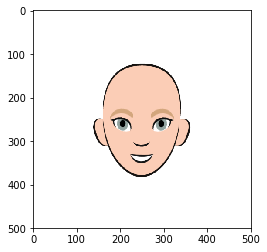

total filenames with glasses_color equal to 2: 14207
['cs12635306962024549106.csv' 0]
/data/shuaman/xgan/cartoonset100k/0/cs12635306962024549106.csv


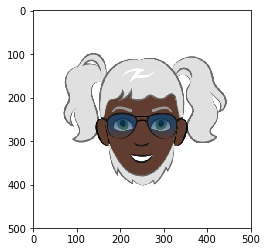

total filenames with glasses_color equal to 5: 14391
['cs12295847456262766239.csv' 0]
/data/shuaman/xgan/cartoonset100k/0/cs12295847456262766239.csv


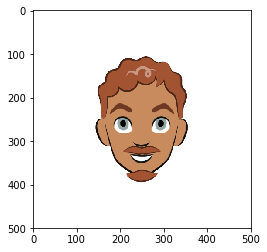

total filenames with glasses_color equal to 4: 14361
['cs12802970240000486747.csv' 0]
/data/shuaman/xgan/cartoonset100k/0/cs12802970240000486747.csv


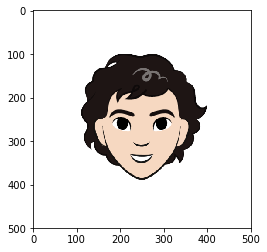

total filenames with glasses_color equal to 0: 14243
['cs12727711338231345594.csv' 0]
/data/shuaman/xgan/cartoonset100k/0/cs12727711338231345594.csv


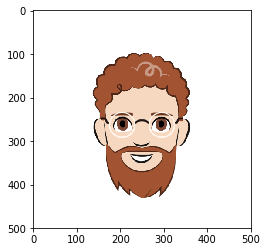

total filenames with glasses_color equal to 3: 14326
['cs12407262374500485107.csv' 0]
/data/shuaman/xgan/cartoonset100k/0/cs12407262374500485107.csv


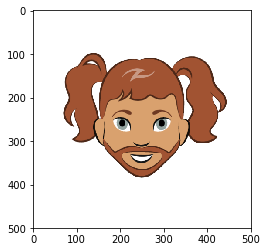

total filenames with glasses_color equal to 1: 14294
['cs11944705194443706544.csv' 0]
/data/shuaman/xgan/cartoonset100k/0/cs11944705194443706544.csv


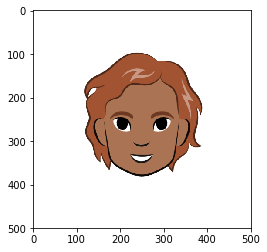

In [974]:
show_samples_feature(df_cartoon, "glasses_color", 1)

# Analize shapes: face_shape, facial_hair, glasses, hair

In [975]:
df_cartoon.astype('object').describe().transpose()

,count,unique,top,freq
filename,100000,100000,cs11620325594826003821.csv,1
chin_length,100000,3,0,33439
eye_angle,100000,3,1,33487
eye_color,100000,5,3,20218
eye_eyebrow_distance,100000,3,0,33420
eye_lashes,100000,2,0,50158
eye_lid,100000,2,0,50102
eye_slant,100000,3,2,33537
eyebrow_shape,100000,14,4,7359
eyebrow_thickness,100000,4,3,25176


In [976]:
def show_samples_idx(df_cartoon, idx, sample_len):
    file_names = df_cartoon.loc[idx,["filename","subfolder"]]
    
    print("unique values of index: {}".format(len(file_names)))    
    
    for file in file_names[:sample_len].values:
        print(file)
        print(os.path.join(path_cartoons,str(file[1]), file[0]))
        img=mpimg.imread(os.path.join(path_cartoons,str(file[1]), (file[0].split('.'))[0]+".png"))
        imgplot = plt.imshow(img)
        plt.show()

In [1170]:
#0 barba creciendo
#1 barba al lado de la cara
#2 barba grande sin afeitar
#3 barba peque;a sin afeitar
#4 barba peque'a en el menton
#5 bigote
#6 bigote y barba mediana en el menton
#7 bigote y barba peque;a en el menton
#8 barba crecida peque;a hasta la oreja
#9 barba crecida peque;a no oreja
#10 barba con estilo cuidado
#11 barba crecida grande hasta la oreja
#12 barba que cubre el cuello
#13 peque;a barba e el menton
#14 no barba
facial_hair_active = [0,2,3,4,5,6,7,8,9,10,11,12,13]
facial_no_hair = [14]
facial_hair_delete = [1,12]
#idx = (df_cartoon.facial_hair==14)
#show_samples_idx(df_cartoon, idx, 4)

In [978]:
facial_hair_active
facial_no_hair

[14]

unique values of index: 3745
['cs12635306962024549106.csv' 0]
/data/shuaman/xgan/cartoonset100k/0/cs12635306962024549106.csv


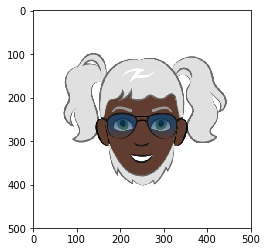

['cs12234504004715423803.csv' 0]
/data/shuaman/xgan/cartoonset100k/0/cs12234504004715423803.csv


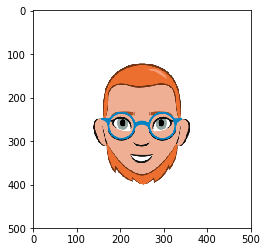

['cs12501581083949388100.csv' 0]
/data/shuaman/xgan/cartoonset100k/0/cs12501581083949388100.csv


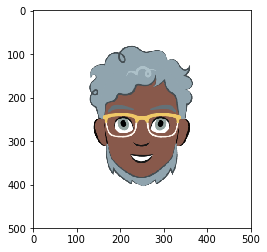

['cs12471524631921871063.csv' 0]
/data/shuaman/xgan/cartoonset100k/0/cs12471524631921871063.csv


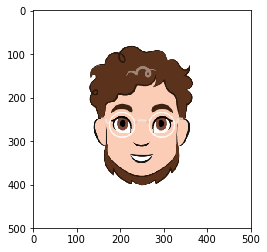

In [1169]:
idx = (df_cartoon.facial_hair==12)
show_samples_idx(df_cartoon, idx, 4)

In [1180]:
#hair 0 calvo, 1 2 poco cabello
hair_type_woman = [3, 4, 13, 25, 27, 28, 29, 33, 34, 35, 41, 48, 56, 58, 59, 60, 63, 64, 67, 69, 70, 75, 78,
        79, 80, 82, 86, 87, 90, 95, 96, 102,6,7,9,36,40,42,47,55,57,65, 68, 71, 81, 84, 85, 93, 94, 97, 100,
                  101, 103, 26]
hair_type_man = [1, 2, 8, 11, 12, 17, 22, 23, 31, 32, 39, 43, 44, 45, 46, 49, 50, 51, 53, 54, 61, 62, 66, 72,
        73, 74, 76, 77, 83, 89, 92, 99, 107,10,14,18,19,20,21,30,38,52, 105] 
hair_type_mix = [0, 5, 15, 16, 24, 37, 88, 91, 98, 104, 106]

hair_type_delete = [108, 109, 110]
#idx = (df_cartoon.hair==110)
#show_samples_idx(df_cartoon, idx, 2)

unique values of index: 871
['cs12515432083542342790.csv' 0]
/data/shuaman/xgan/cartoonset100k/0/cs12515432083542342790.csv


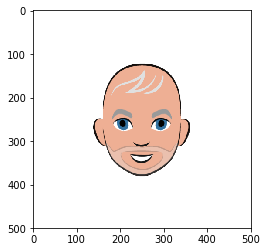

['cs11546577168904287900.csv' 0]
/data/shuaman/xgan/cartoonset100k/0/cs11546577168904287900.csv


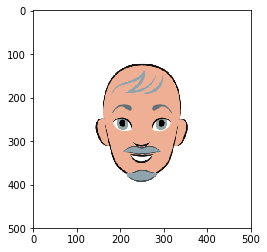

['cs12502509500300098450.csv' 0]
/data/shuaman/xgan/cartoonset100k/0/cs12502509500300098450.csv


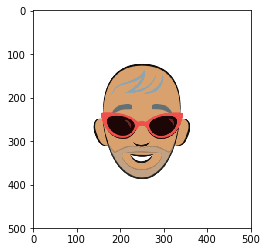

['cs11677867885593057461.csv' 0]
/data/shuaman/xgan/cartoonset100k/0/cs11677867885593057461.csv


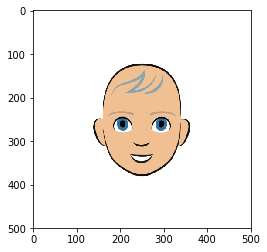

['cs12787294766610780667.csv' 0]
/data/shuaman/xgan/cartoonset100k/0/cs12787294766610780667.csv


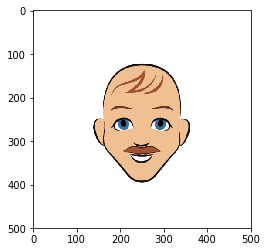

In [1181]:
idx = (df_cartoon.hair==110)
show_samples_idx(df_cartoon, idx, 5)

In [998]:
#glasses 11 no lentes
glass_type_delete = [10]
glass_type_keep = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11]
#idx = (df_cartoon.glasses==10)
#show_samples_idx(df_cartoon, idx, 5)

In [999]:
glass_type_delete
hair_type_delete

[108, 109, 110]

unique values of index: 4547
['cs12470686444857629084.csv' 0]
/data/shuaman/xgan/cartoonset100k/0/cs12470686444857629084.csv


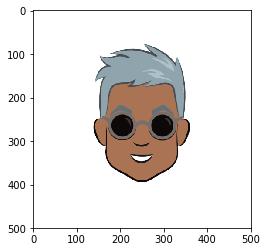

['cs12824785345146842494.csv' 0]
/data/shuaman/xgan/cartoonset100k/0/cs12824785345146842494.csv


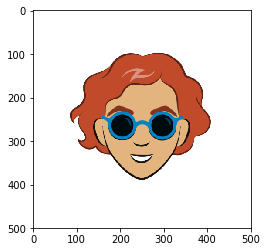

['cs12770999743532082290.csv' 0]
/data/shuaman/xgan/cartoonset100k/0/cs12770999743532082290.csv


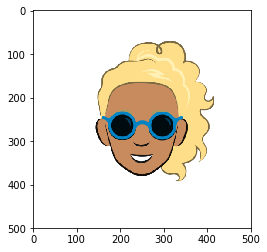

['cs12931390211607790544.csv' 0]
/data/shuaman/xgan/cartoonset100k/0/cs12931390211607790544.csv


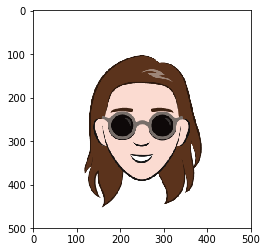

['cs11864405778891558146.csv' 0]
/data/shuaman/xgan/cartoonset100k/0/cs11864405778891558146.csv


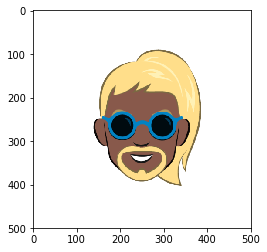

In [1195]:
idx = (df_cartoon.glasses==9)
show_samples_idx(df_cartoon, idx, 5)

In [1000]:
#face shape no se puede decir nada de esto
#idx = (df_cartoon.face_shape==7)
#show_samples_idx(df_cartoon, idx, 5)

# Analize colors: face_color, glasses_color, hair_color 

In [1001]:
df_cartoon.astype('object').describe().transpose()

,count,unique,top,freq
filename,100000,100000,cs11620325594826003821.csv,1
chin_length,100000,3,0,33439
eye_angle,100000,3,1,33487
eye_color,100000,5,3,20218
eye_eyebrow_distance,100000,3,0,33420
eye_lashes,100000,2,0,50158
eye_lid,100000,2,0,50102
eye_slant,100000,3,2,33537
eyebrow_shape,100000,14,4,7359
eyebrow_thickness,100000,4,3,25176


In [1208]:
#face color
face_color_dark = [0, 1]
face_color_light = [6, 7, 8, 9, 10]
face_color_mix = [2, 3, 4, 5]

unique values of index: 9050
['cs12551257150513738685.csv' 0]
/data/shuaman/xgan/cartoonset100k/0/cs12551257150513738685.csv


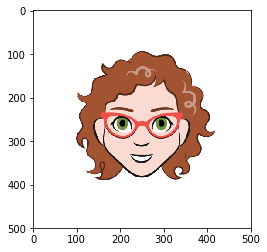

['cs11797828115854852080.csv' 0]
/data/shuaman/xgan/cartoonset100k/0/cs11797828115854852080.csv


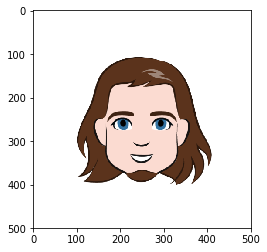

['cs12900427273464675317.csv' 0]
/data/shuaman/xgan/cartoonset100k/0/cs12900427273464675317.csv


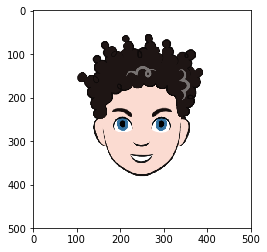

['cs11587779610746875818.csv' 0]
/data/shuaman/xgan/cartoonset100k/0/cs11587779610746875818.csv


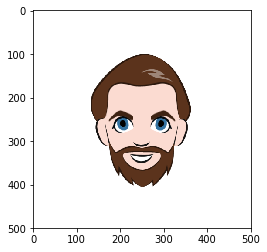

['cs12754599573847012395.csv' 0]
/data/shuaman/xgan/cartoonset100k/0/cs12754599573847012395.csv


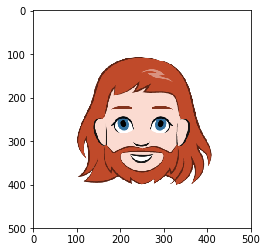

In [1206]:
idx = (df_cartoon.face_color==10)
show_samples_idx(df_cartoon, idx, 5)

In [1004]:
# face color, nada que decir
df_cartoon.face_color.value_counts()

2     9217
7     9187
4     9136
5     9130
6     9120
0     9087
8     9064
1     9058
10    9050
9     8984
3     8967
Name: face_color, dtype: int64

In [1209]:
# glasses_color
glass_color_delete = [2, 5]
glass_color_keep = [0, 1, 3, 4, 6]
#idx = (df_cartoon.glasses_color==7)
#show_samples_idx(df_cartoon, idx, 10)

unique values of index: 14178
['cs12826911209357845547.csv' 0]
/data/shuaman/xgan/cartoonset100k/0/cs12826911209357845547.csv


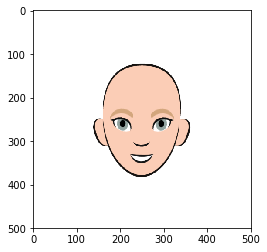

['cs11875512358211246317.csv' 0]
/data/shuaman/xgan/cartoonset100k/0/cs11875512358211246317.csv


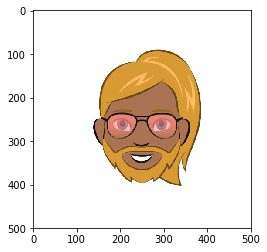

['cs12739224747264978264.csv' 0]
/data/shuaman/xgan/cartoonset100k/0/cs12739224747264978264.csv


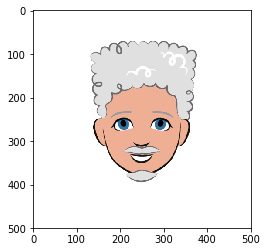

['cs11595140531194424297.csv' 0]
/data/shuaman/xgan/cartoonset100k/0/cs11595140531194424297.csv


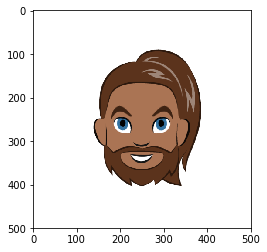

['cs11627220985617684988.csv' 0]
/data/shuaman/xgan/cartoonset100k/0/cs11627220985617684988.csv


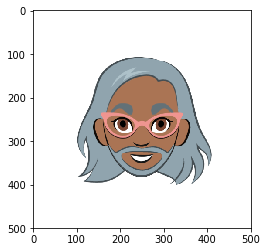

['cs1211568059283772282.csv' 0]
/data/shuaman/xgan/cartoonset100k/0/cs1211568059283772282.csv


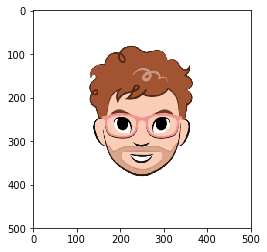

['cs12318593934895708315.csv' 0]
/data/shuaman/xgan/cartoonset100k/0/cs12318593934895708315.csv


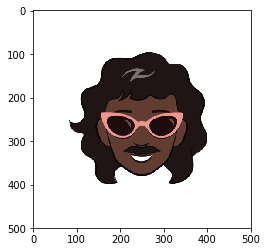

['cs11816773619187199785.csv' 0]
/data/shuaman/xgan/cartoonset100k/0/cs11816773619187199785.csv


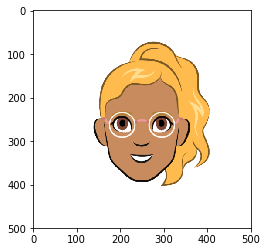

['cs11945854880592038754.csv' 0]
/data/shuaman/xgan/cartoonset100k/0/cs11945854880592038754.csv


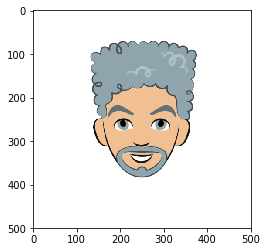

['cs11609562780192076158.csv' 0]
/data/shuaman/xgan/cartoonset100k/0/cs11609562780192076158.csv


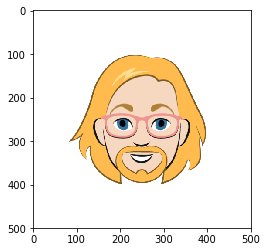

In [1216]:
idx = (df_cartoon.glasses_color==6)
show_samples_idx(df_cartoon, idx, 10)

In [1217]:
#hair_color
hair_color_keep = [0, 1, 2, 3, 5, 6, 7, 9]
hair_color_delete = [8, 4]
#idx = (df_cartoon.hair_color==0)
#show_samples_idx(df_cartoon, idx, 2)

hair_color_light = [0, 1, 2, 4]
hair_color_mix = [3,5,6,7,8,9]

#idx = (df_cartoon.hair_color==3)
#show_samples_idx(df_cartoon, idx, 2)

unique values of index: 10110
['cs12826911209357845547.csv' 0]
/data/shuaman/xgan/cartoonset100k/0/cs12826911209357845547.csv


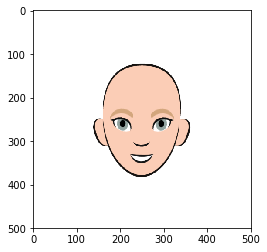

['cs12477825949976837499.csv' 0]
/data/shuaman/xgan/cartoonset100k/0/cs12477825949976837499.csv


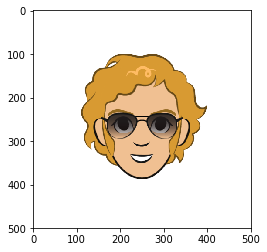

In [1218]:
idx = (df_cartoon.hair_color==4)
show_samples_idx(df_cartoon, idx, 2)

# Drop images which have removed attributes

In [1219]:
hair_color_delete

[8, 4]

In [1220]:
glass_type_delete
hair_type_delete
glass_color_delete
hair_color_delete
facial_hair_delete

[1, 12]

In [1221]:
df_cartoon.head()

,filename,chin_length,eye_angle,eye_color,eye_eyebrow_distance,eye_lashes,eye_lid,eye_slant,eyebrow_shape,eyebrow_thickness,eyebrow_weight,eyebrow_width,face_color,face_shape,facial_hair,glasses,glasses_color,hair,hair_color,subfolder
0,cs12826911209357845547.csv,0,2,3,0,0,0,1,6,3,1,0,9,3,14,11,6,0,4,0
1,cs12635306962024549106.csv,1,0,2,1,1,0,2,3,1,1,1,0,2,12,0,2,96,9,0
2,cs12295847456262766239.csv,0,0,3,1,1,1,0,0,2,0,1,3,2,6,11,5,11,5,0
3,cs12802970240000486747.csv,1,0,4,2,1,0,1,3,1,0,2,8,1,14,11,4,10,7,0
4,cs12727711338231345594.csv,2,1,0,2,1,1,0,11,1,1,0,8,6,2,5,0,17,5,0


In [1222]:
idx = (df_cartoon.glasses.isin(glass_type_delete)) | (df_cartoon.hair.isin(hair_type_delete)) | (df_cartoon.glasses_color.isin(glass_color_delete)) | (df_cartoon.hair_color.isin(hair_color_delete)) | (df_cartoon.facial_hair.isin(facial_hair_delete))

In [1223]:
df_cartoon_filter1 =  df_cartoon.loc[-idx,:].reset_index(drop=True)

In [1224]:
df_cartoon_filter1.shape

(49050, 20)

In [1225]:
df_cartoon_filter1[df_cartoon_filter1.facial_hair==1]

,filename,chin_length,eye_angle,eye_color,eye_eyebrow_distance,eye_lashes,eye_lid,eye_slant,eyebrow_shape,eyebrow_thickness,eyebrow_weight,eyebrow_width,face_color,face_shape,facial_hair,glasses,glasses_color,hair,hair_color,subfolder


# Analize images with realistic shapes

In [1226]:
facial_no_hair

[14]

In [1056]:
#mujeres con cabello de mujer no tienen barba
facial_no_hair
hair_type_woman

[3,
 4,
 13,
 25,
 27,
 28,
 29,
 33,
 34,
 35,
 41,
 48,
 56,
 58,
 59,
 60,
 63,
 64,
 67,
 69,
 70,
 75,
 78,
 79,
 80,
 82,
 86,
 87,
 90,
 95,
 96,
 102,
 6,
 7,
 9,
 36,
 40,
 42,
 47,
 55,
 57,
 65,
 68,
 71,
 81,
 84,
 85,
 93,
 94,
 97,
 100,
 101,
 103,
 26]

In [1227]:
facial_no_hair

[14]

In [1228]:
idx_women = ((df_cartoon_filter1.hair.isin(hair_type_woman)) & (df_cartoon_filter1.facial_hair.isin(facial_no_hair)))

In [1229]:
df_cartoon_filter1.loc[idx_women,:].shape

(13161, 20)

In [1230]:
#personas con cabello de varon y mixto pueden tener barba o no

In [1231]:
facial_hair_active
facial_no_hair
hair_type_man
hair_type_mix

[0, 5, 15, 16, 24, 37, 88, 91, 98, 104, 106]

In [1232]:
df_cartoon_filter1.head()

,filename,chin_length,eye_angle,eye_color,eye_eyebrow_distance,eye_lashes,eye_lid,eye_slant,eyebrow_shape,eyebrow_thickness,eyebrow_weight,eyebrow_width,face_color,face_shape,facial_hair,glasses,glasses_color,hair,hair_color,subfolder
0,cs12802970240000486747.csv,1,0,4,2,1,0,1,3,1,0,2,8,1,14,11,4,10,7,0
1,cs12727711338231345594.csv,2,1,0,2,1,1,0,11,1,1,0,8,6,2,5,0,17,5,0
2,cs12407262374500485107.csv,0,2,3,2,1,0,1,8,1,1,1,4,0,8,11,3,96,5,0
3,cs12551257150513738685.csv,0,1,2,0,0,1,1,5,0,0,0,10,0,14,2,3,36,5,0
4,cs12177889581903311720.csv,0,1,1,1,1,1,0,4,0,0,0,6,6,14,3,0,49,2,0


In [1233]:
df_cartoon_filter1.shape

(49050, 20)

In [1234]:
df_cartoon_filter1.loc[(-df_cartoon_filter1.hair.isin(hair_type_woman)) ,:].shape

(24611, 20)

In [1235]:
df_cartoon_filter1.loc[(-df_cartoon_filter1.hair.isin(hair_type_woman))|(idx_women) ,:].shape

(37772, 20)

In [1236]:
df_cartoon_filter2 = df_cartoon_filter1.loc[(-df_cartoon_filter1.hair.isin(hair_type_woman))|(idx_women) ,:].reset_index(drop=True)

In [1237]:
df_cartoon_filter2.shape

(37772, 20)

# Analize images with realistic color of skin and hair

In [ ]:
face_color_dark
hair_color_light

In [1238]:
df_cartoon_filter2.head(1)

,filename,chin_length,eye_angle,eye_color,eye_eyebrow_distance,eye_lashes,eye_lid,eye_slant,eyebrow_shape,eyebrow_thickness,eyebrow_weight,eyebrow_width,face_color,face_shape,facial_hair,glasses,glasses_color,hair,hair_color,subfolder
0,cs12802970240000486747.csv,1,0,4,2,1,0,1,3,1,0,2,8,1,14,11,4,10,7,0


In [1239]:
df_cartoon_filter2.loc[df_cartoon_filter2.face_color.isin(face_color_dark),:].shape

(6963, 20)

In [1240]:
idx_dark_color = ((df_cartoon_filter2.face_color.isin(face_color_dark)) & (-df_cartoon_filter2.hair_color.isin(hair_color_light)))

In [1241]:
df_cartoon_filter2.loc[idx_dark_color,:].shape

(4325, 20)

In [1242]:
df_cartoon_filter2.loc[(-df_cartoon_filter2.face_color.isin(face_color_dark)) | (idx_dark_color),:].shape

(35134, 20)

In [1243]:
df_cartoon_filter_final = df_cartoon_filter2.loc[(-df_cartoon_filter2.face_color.isin(face_color_dark)) | (idx_dark_color),:].reset_index(drop=True)

In [1244]:
df_cartoon_filter_final.shape

(35134, 20)

In [1245]:
hair_color_light

[0, 1, 2, 4]

unique values of index: 12262
['cs12551257150513738685.csv' 0]
/data/shuaman/xgan/cartoonset100k/0/cs12551257150513738685.csv


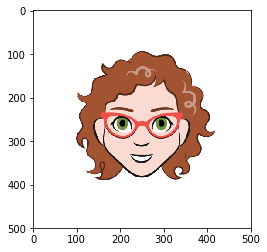

['cs12551165890955008352.csv' 0]
/data/shuaman/xgan/cartoonset100k/0/cs12551165890955008352.csv


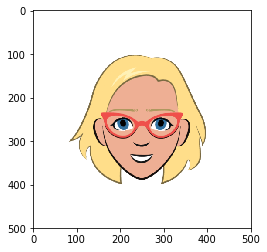

['cs11917673568060168656.csv' 0]
/data/shuaman/xgan/cartoonset100k/0/cs11917673568060168656.csv


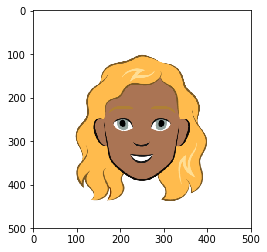

['cs12191637763278935627.csv' 0]
/data/shuaman/xgan/cartoonset100k/0/cs12191637763278935627.csv


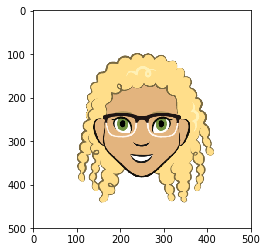

['cs11589973748251342218.csv' 0]
/data/shuaman/xgan/cartoonset100k/0/cs11589973748251342218.csv


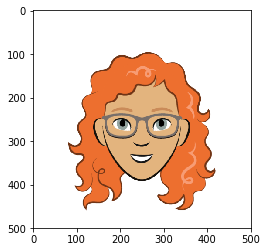

['cs12575013613018195074.csv' 0]
/data/shuaman/xgan/cartoonset100k/0/cs12575013613018195074.csv


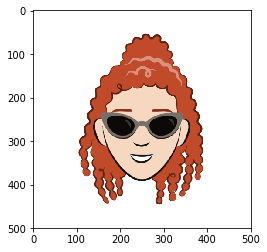

['cs12931390211607790544.csv' 0]
/data/shuaman/xgan/cartoonset100k/0/cs12931390211607790544.csv


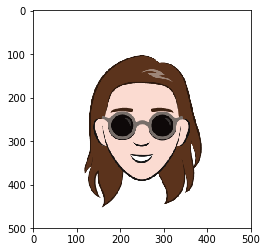

['cs11816773619187199785.csv' 0]
/data/shuaman/xgan/cartoonset100k/0/cs11816773619187199785.csv


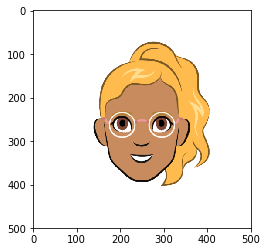

['cs12502105346543688081.csv' 0]
/data/shuaman/xgan/cartoonset100k/0/cs12502105346543688081.csv


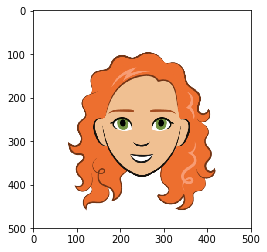

['cs12865405701923969393.csv' 0]
/data/shuaman/xgan/cartoonset100k/0/cs12865405701923969393.csv


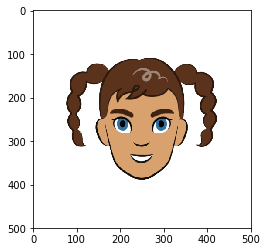

In [1265]:
idx = ((df_cartoon_filter_final.hair.isin(hair_type_woman))&(df_cartoon_filter_final.facial_hair==14))
#idx = (df_cartoon_filter2.hair.isin(hair_type_woman))
       
show_samples_idx(df_cartoon_filter_final, idx, 10)

In [1266]:
df_cartoon_filter_final.shape

(35134, 20)

In [1267]:
df_cartoon_filter_final.head()

,filename,chin_length,eye_angle,eye_color,eye_eyebrow_distance,eye_lashes,eye_lid,eye_slant,eyebrow_shape,eyebrow_thickness,eyebrow_weight,eyebrow_width,face_color,face_shape,facial_hair,glasses,glasses_color,hair,hair_color,subfolder
0,cs12802970240000486747.csv,1,0,4,2,1,0,1,3,1,0,2,8,1,14,11,4,10,7,0
1,cs12727711338231345594.csv,2,1,0,2,1,1,0,11,1,1,0,8,6,2,5,0,17,5,0
2,cs12551257150513738685.csv,0,1,2,0,0,1,1,5,0,0,0,10,0,14,2,3,36,5,0
3,cs12177889581903311720.csv,0,1,1,1,1,1,0,4,0,0,0,6,6,14,3,0,49,2,0
4,cs12551165890955008352.csv,1,0,1,0,0,0,2,13,0,1,2,6,1,14,2,3,82,0,0


In [1280]:
df_cartoon_filter_final.glasses.value_counts()

11    18497
9      1705
1      1687
5      1675
7      1667
8      1663
0      1662
3      1658
4      1657
6      1650
2      1613
Name: glasses, dtype: int64

In [1281]:
df_cartoon_filter_final.to_csv(path_cartoons + "/cartoon100k_limited.csv.gz", header=True, compression="gzip", index=False)

In [5]:
df_cartoon_filter_final = pd.read_csv(path_cartoons + "/cartoon100k_limited.csv.gz")


In [7]:
df_cartoon_filter_final.shape

(35134, 20)

In [6]:
df_cartoon_filter_final.head()

,filename,chin_length,eye_angle,eye_color,eye_eyebrow_distance,eye_lashes,eye_lid,eye_slant,eyebrow_shape,eyebrow_thickness,eyebrow_weight,eyebrow_width,face_color,face_shape,facial_hair,glasses,glasses_color,hair,hair_color,subfolder
0,cs12802970240000486747.csv,1,0,4,2,1,0,1,3,1,0,2,8,1,14,11,4,10,7,0
1,cs12727711338231345594.csv,2,1,0,2,1,1,0,11,1,1,0,8,6,2,5,0,17,5,0
2,cs12551257150513738685.csv,0,1,2,0,0,1,1,5,0,0,0,10,0,14,2,3,36,5,0
3,cs12177889581903311720.csv,0,1,1,1,1,1,0,4,0,0,0,6,6,14,3,0,49,2,0
4,cs12551165890955008352.csv,1,0,1,0,0,0,2,13,0,1,2,6,1,14,2,3,82,0,0


In [9]:
writePath = "filelist.txt"

In [19]:
df_cartoon_filter_final["filename_png"] = df_cartoon_filter_final["filename"].apply(lambda x: x.split('.')[0])+ '.png'

In [20]:
df_cartoon_filter_final.head()

,filename,chin_length,eye_angle,eye_color,eye_eyebrow_distance,eye_lashes,eye_lid,eye_slant,eyebrow_shape,eyebrow_thickness,...,eyebrow_width,face_color,face_shape,facial_hair,glasses,glasses_color,hair,hair_color,subfolder,filename_png
0,cs12802970240000486747.csv,1,0,4,2,1,0,1,3,1,...,2,8,1,14,11,4,10,7,0,cs12802970240000486747.png
1,cs12727711338231345594.csv,2,1,0,2,1,1,0,11,1,...,0,8,6,2,5,0,17,5,0,cs12727711338231345594.png
2,cs12551257150513738685.csv,0,1,2,0,0,1,1,5,0,...,0,10,0,14,2,3,36,5,0,cs12551257150513738685.png
3,cs12177889581903311720.csv,0,1,1,1,1,1,0,4,0,...,0,6,6,14,3,0,49,2,0,cs12177889581903311720.png
4,cs12551165890955008352.csv,1,0,1,0,0,0,2,13,0,...,2,6,1,14,2,3,82,0,0,cs12551165890955008352.png


In [21]:
df_cartoon_filter_final["filename_png"].to_csv(writePath, header=None, index=None, sep=' ', mode='a')